<a href="https://colab.research.google.com/github/ritaprova/Machile-learning-/blob/main/Multinomial_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#usual imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#getting the data 
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()

data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space',
 'comp.graphics',]  # selecting only few categories for training 
 
 #getting training and testing sets 
train = fetch_20newsgroups(subset="train",categories=categories)
test = fetch_20newsgroups(subset="test",categories=categories)
train.data[5]

"From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)\nSubject: Federal Hearing\nOriginator: dmcgee@uluhe\nOrganization: School of Ocean and Earth Science and Technology\nDistribution: usa\nLines: 10\n\n\nFact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the\nuse of the bible reading and prayer in public schools 15 years ago is now\ngoing to appear before the FCC with a petition to stop the reading of the\nGospel on the airways of America.  And she is also campaigning to remove\nChristmas programs, songs, etc from the public schools.  If it is true\nthen mail to Federal Communications Commission 1919 H Street Washington DC\n20054 expressing your opposition to her request.  Reference Petition number\n\n2493.\n"

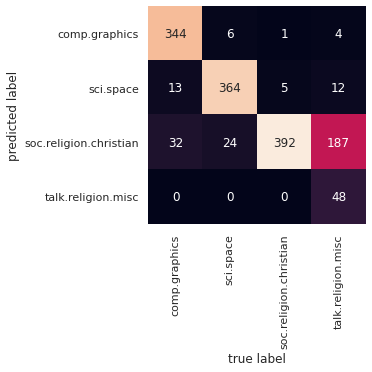

In [6]:
#feature engineering 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

#fitting
model.fit(train.data, train.target)
labels = model.predict(test.data)

#metrics 
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [7]:
def predict_category(s, train=train, model=model):
 pred = model.predict([s])
 return train.target_names[pred[0]]

In [12]:
predict_category("What is my screen resolution ?")

'comp.graphics'